#### Data Load & Preparation

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the sports activity dataset
url = 'https://raw.githubusercontent.com/Redback-Operations/redback-fit-sports-performance/main/Cycling%20Analysis/data/extended_activities.csv'
# Read the CSV file directly from the URL
df = pd.read_csv(url)

# Displaying the first 5 rows
df.head(5)

,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,...,Maximum Power 10s,Maximum Power 30s,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr
0,2929442069,"13 Dec 2019, 01:46:07",Lunch Ride,Ride,3859,22.97,139.0,11.0,False,NaN,...,412.9,342.1,221.2,162.2,136.3,120.8,109.8,105.4,0.0,0.0
1,2945780637,"20 Dec 2019, 23:05:01",Morning Ride,Ride,4852,29.65,133.0,12.0,False,NaN,...,342.1,236.1,184.3,150.6,131.4,122.1,120.3,115.6,0.0,0.0
2,2948028275,"21 Dec 2019, 23:25:29",Morning Ride,Ride,5817,32.38,139.0,19.0,False,NaN,...,390.5,265.1,213.3,146.2,135.1,127.5,125.5,110.2,104.7,0.0
3,2952462113,"24 Dec 2019, 01:19:17",Lunch Ride,Ride,3851,21.68,140.0,11.0,False,NaN,...,452.0,303.1,262.0,161.9,146.7,139.7,134.0,112.3,0.0,0.0
4,2956494096,"26 Dec 2019, 00:09:08",Lunch Ride,Ride,5843,32.36,131.0,14.0,False,NaN,...,342.9,243.9,208.3,134.7,124.0,119.4,115.5,99.8,96.9,0.0


In [3]:
# Converting the Activity Date column to date format
df["Activity Date"] = pd.to_datetime(df["Activity Date"])

# Sort data ascending by Activity Date
df.sort_values(by=['Activity Date'])

# Changing date to string format for visualisation
df["Activity Date"] = df["Activity Date"].dt.strftime("%d-%m-%Y")


In [4]:
# Isolating the cycling data component
df_ride = df[df['Activity Type'] == 'Ride']

In [19]:
df_ride.head(5)

,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,...,Maximum Power 10s,Maximum Power 30s,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr
0,2929442069,13-12-2019,Lunch Ride,Ride,3859,22.97,139.0,11.0,False,NaN,...,412.9,342.1,221.2,162.2,136.3,120.8,109.8,105.4,0.0,0.0
1,2945780637,20-12-2019,Morning Ride,Ride,4852,29.65,133.0,12.0,False,NaN,...,342.1,236.1,184.3,150.6,131.4,122.1,120.3,115.6,0.0,0.0
2,2948028275,21-12-2019,Morning Ride,Ride,5817,32.38,139.0,19.0,False,NaN,...,390.5,265.1,213.3,146.2,135.1,127.5,125.5,110.2,104.7,0.0
3,2952462113,24-12-2019,Lunch Ride,Ride,3851,21.68,140.0,11.0,False,NaN,...,452.0,303.1,262.0,161.9,146.7,139.7,134.0,112.3,0.0,0.0
4,2956494096,26-12-2019,Lunch Ride,Ride,5843,32.36,131.0,14.0,False,NaN,...,342.9,243.9,208.3,134.7,124.0,119.4,115.5,99.8,96.9,0.0


In [5]:
# Describing data 
df_ride.describe()

,Activity ID,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Athlete Weight,Bike Weight,Moving Time,Max Speed,Average Speed,...,Maximum Power 10s,Maximum Power 30s,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr
count,1.810000e+02,181.000000,181.000000,181.000000,181.000000,70.000000,162.0,181.000000,181.000000,181.000000,...,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,5.716277e+09,7419.679558,54.417569,145.154696,34.375691,80.228571,8.0,7155.767956,12.226391,7.609132,...,321.023204,258.464641,231.839227,193.118232,183.176243,176.101657,171.045856,154.254696,128.024862,63.697238
std,2.432000e+09,3703.592560,28.127591,13.875572,28.137406,0.935165,0.0,3568.567951,2.235716,0.842069,...,69.178769,44.409681,34.792998,29.475737,29.699013,28.752893,30.212997,44.479416,68.189694,79.393575
min,2.929442e+09,1626.000000,10.960000,118.000000,5.000000,80.000000,8.0,1571.000000,6.276172,4.495522,...,158.000000,157.100000,156.600000,127.600000,119.000000,115.300000,0.000000,0.000000,0.000000,0.000000
25%,3.218871e+09,5635.000000,38.110000,137.000000,18.000000,80.000000,8.0,5468.000000,10.700000,7.191000,...,278.600000,232.400000,211.900000,173.600000,160.500000,156.100000,152.800000,143.500000,120.500000,0.000000
50%,7.128178e+09,6757.000000,50.890000,143.000000,27.000000,80.000000,8.0,6507.000000,11.944140,7.538679,...,321.700000,259.000000,231.600000,193.500000,183.700000,177.700000,172.000000,164.100000,156.200000,0.000000
75%,8.084769e+09,7998.000000,60.970000,150.000000,40.000000,80.000000,8.0,7707.000000,13.200000,7.982000,...,352.500000,292.200000,256.400000,212.000000,201.200000,192.800000,190.600000,179.700000,174.600000,156.400000
max,1.027158e+10,22391.000000,180.080000,209.000000,232.000000,84.000000,8.0,21208.000000,24.764002,10.652900,...,637.400000,407.500000,298.500000,275.200000,269.900000,266.100000,243.700000,217.800000,212.100000,202.400000


In [6]:
print("Size:", df_ride.size)
print("Shape:", df_ride.shape)
print("==============================")
print("Dataset information:")
print(df_ride.info())

Size: 8869
Shape: (181, 49)
Dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 0 to 343
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Activity ID                181 non-null    int64  
 1   Activity Date              181 non-null    object 
 2   Activity Name              181 non-null    object 
 3   Activity Type              181 non-null    object 
 4   Elapsed Time               181 non-null    int64  
 5   Distance                   181 non-null    float64
 6   Max Heart Rate             181 non-null    float64
 7   Relative Effort            181 non-null    float64
 8   Commute                    181 non-null    bool   
 9   Activity Gear              162 non-null    object 
 10  Filename                   181 non-null    object 
 11  Athlete Weight             70 non-null     float64
 12  Bike Weight                162 non-null    float64
 13  Moving

In [7]:
# Sum the total rows of missing values from each attribute
missing_values = df_ride.isnull().sum()
missing_values

Activity ID                    0
Activity Date                  0
Activity Name                  0
Activity Type                  0
Elapsed Time                   0
Distance                       0
Max Heart Rate                 0
Relative Effort                0
Commute                        0
Activity Gear                 19
Filename                       0
Athlete Weight               111
Bike Weight                   19
Moving Time                    0
Max Speed                      0
Average Speed                  0
Elevation Gain                 1
Elevation Loss                 6
Elevation Low                  6
Elevation High                 6
Max Grade                      0
Average Grade                  0
Max Cadence                    0
Average Cadence                0
Average Heart Rate             0
Average Watts                  0
Calories                       0
Average Temperature            6
Total Work                     1
Perceived Exertion           180
Weighted A

In [8]:
# Filtering data for last 30 sessions
df_ride30 = df_ride.tail(30)
# Checking data
df_ride30.shape

(30, 49)

#### Time series analysis

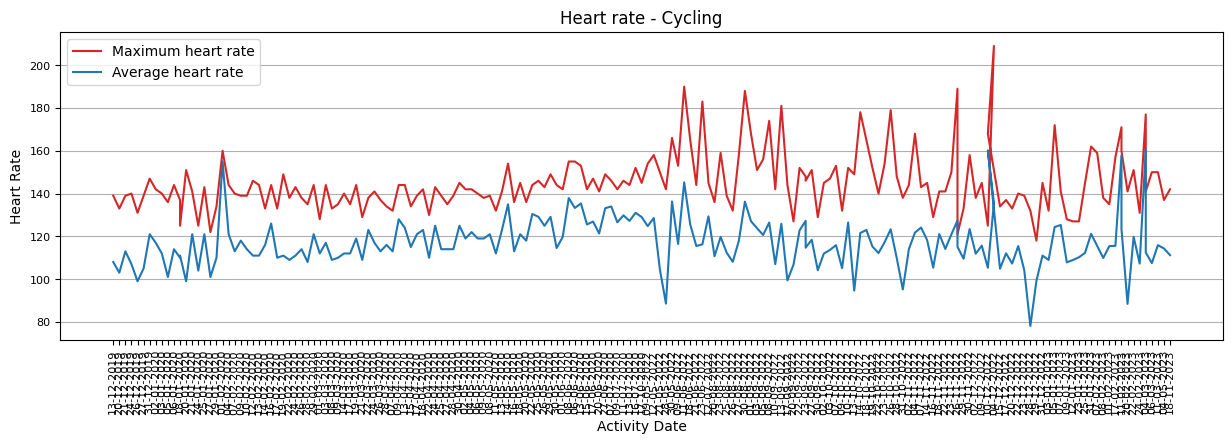

In [9]:
# Plotting data for Heart Rate analysis
def plot_ride_all_hr(d, x, y, z, title="", xlabel='Activity Date', ylabel='Heart Rate', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, z, color='tab:red', label='Maximum heart rate')
    plt.plot(x, y, color='tab:blue',  label='Average heart rate')
    plt.grid(axis='y')
    plt.legend(loc='upper left')
    plt.show()
    
plot_ride_all_hr(d=df_ride, x=df_ride['Activity Date'], y=df_ride['Average Heart Rate'], z=df_ride['Max Heart Rate'], title='Heart rate - Cycling')

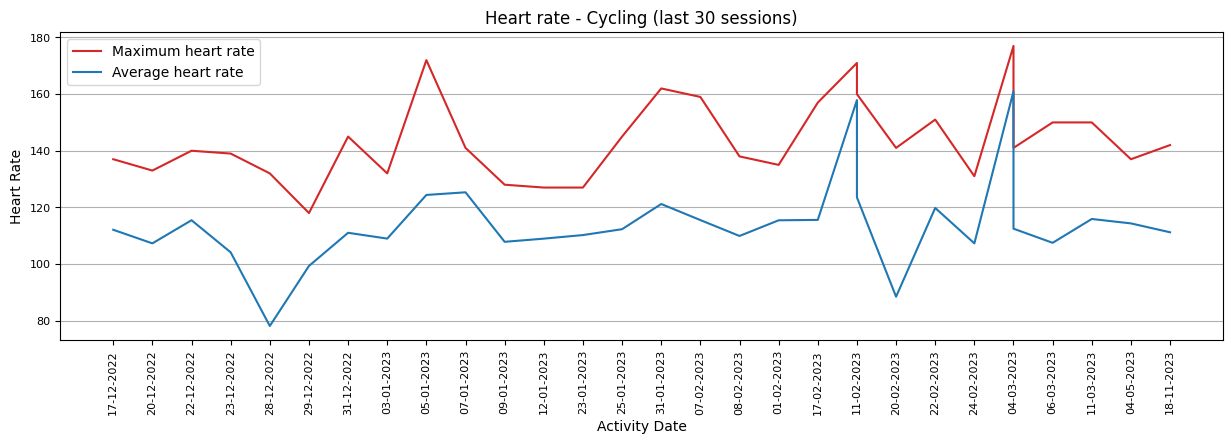

In [10]:
# Plotting data for Heart Rate analysis, last 30 sessions
def plot_ride_30_hr(d, x, y, z, title="", xlabel='Activity Date', ylabel='Heart Rate', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, z, color='tab:red', label='Maximum heart rate')
    plt.plot(x, y, color='tab:blue',  label='Average heart rate')
    plt.grid(axis='y')
    plt.legend(loc='upper left')
    plt.show()
    
plot_ride_30_hr(d=df_ride30, x=df_ride30['Activity Date'], y=df_ride30['Average Heart Rate'], z=df_ride30['Max Heart Rate'], title='Heart rate - Cycling (last 30 sessions)')

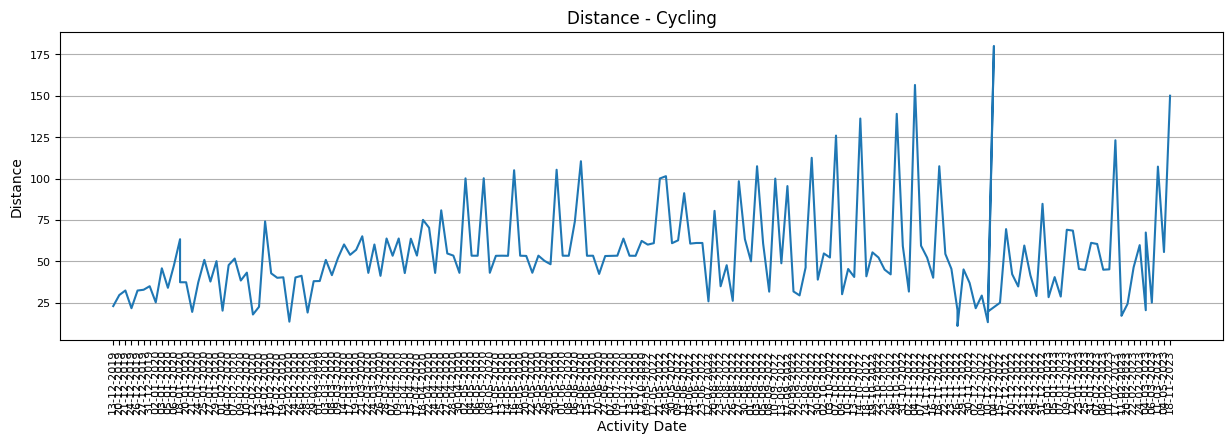

In [11]:
# Plotting data for Distance analysis
def plot_ride_all_dis(d, x, y, title="", xlabel='Activity Date', ylabel='Distance', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.grid(axis='y')
    plt.show()
    
plot_ride_all_dis(d= df_ride, x=df_ride['Activity Date'], y=df_ride['Distance'], title='Distance - Cycling')

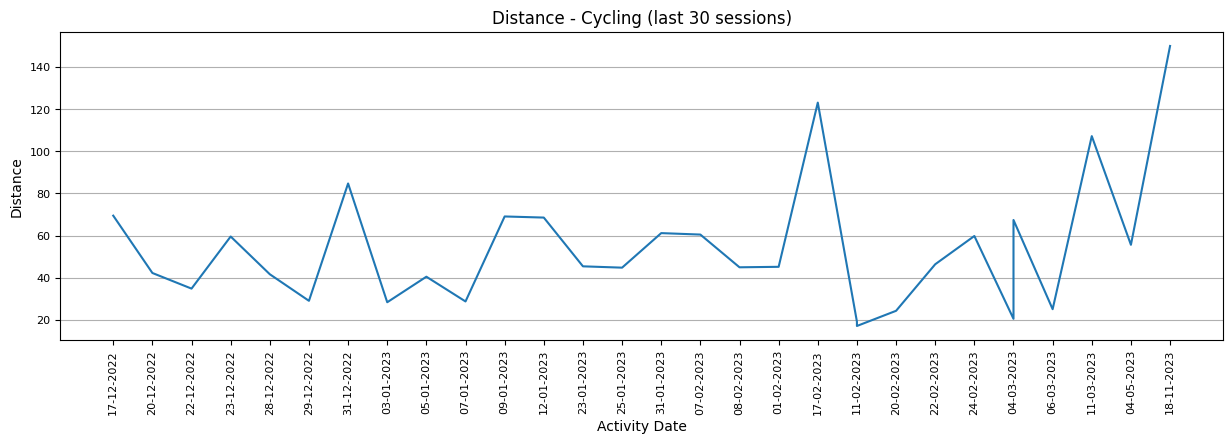

In [12]:
# Plotting data for Distance analysis, last 30 sessions
def plot_ride_30_dis(d, x, y, title="", xlabel='Activity Date', ylabel='Distance', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.grid(axis='y')
    plt.show()
    
plot_ride_30_dis(d= df_ride30, x=df_ride30['Activity Date'], y=df_ride30['Distance'], title='Distance - Cycling (last 30 sessions)')


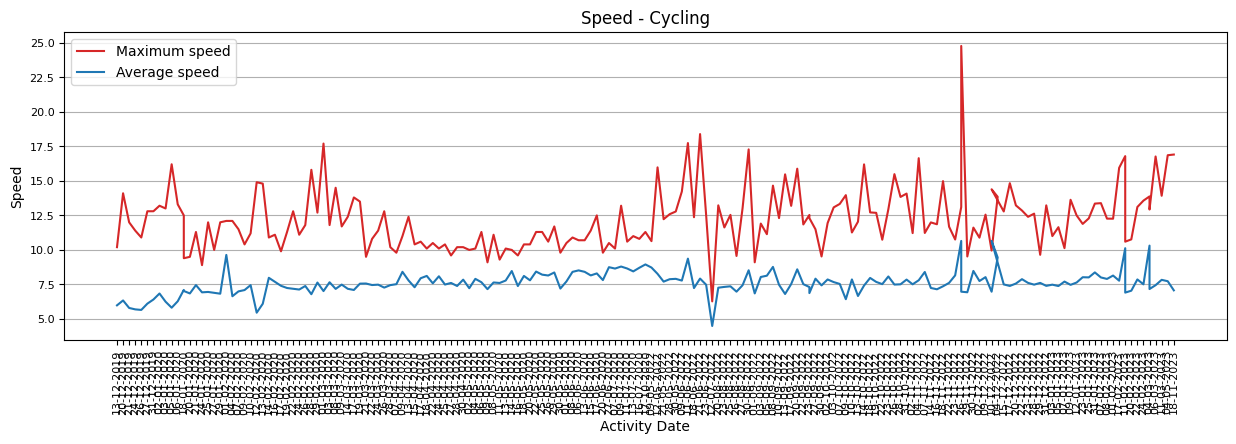

In [13]:
# Plotting data for Speed analysis
def plot_ride_all_spd(d, x, y, z, title="", xlabel='Activity Date', ylabel='Speed', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, z, color='tab:red', label='Maximum speed')
    plt.plot(x, y, color='tab:blue',  label='Average speed')
    plt.legend(loc='upper left')
    plt.grid(axis='y')
    plt.show()
    
plot_ride_all_spd(d=df_ride, x=df_ride['Activity Date'], y=df_ride['Average Speed'], z=df_ride['Max Speed'], title='Speed - Cycling')

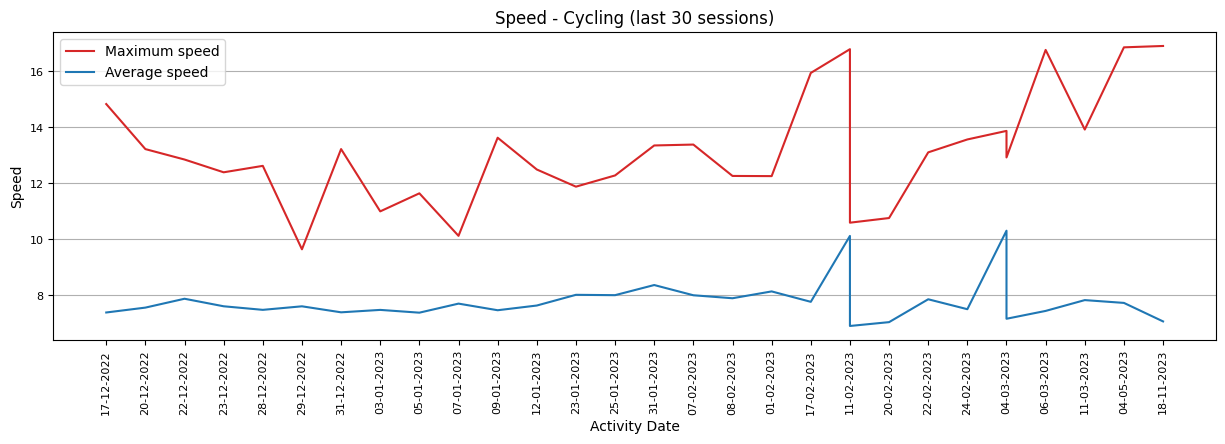

In [14]:
# Plotting data for Speed analysis,last 30 sessions
def plot_ride_30_spd(d, x, y, z, title="", xlabel='Activity Date', ylabel='Speed', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, z, color='tab:red', label='Maximum speed')
    plt.plot(x, y, color='tab:blue',  label='Average speed')
    plt.legend(loc='upper left')
    plt.grid(axis='y')    
    plt.show()
    
plot_ride_30_spd(d=df_ride30, x=df_ride30['Activity Date'], y=df_ride30['Average Speed'], z=df_ride30['Max Speed'], title='Speed - Cycling (last 30 sessions)')

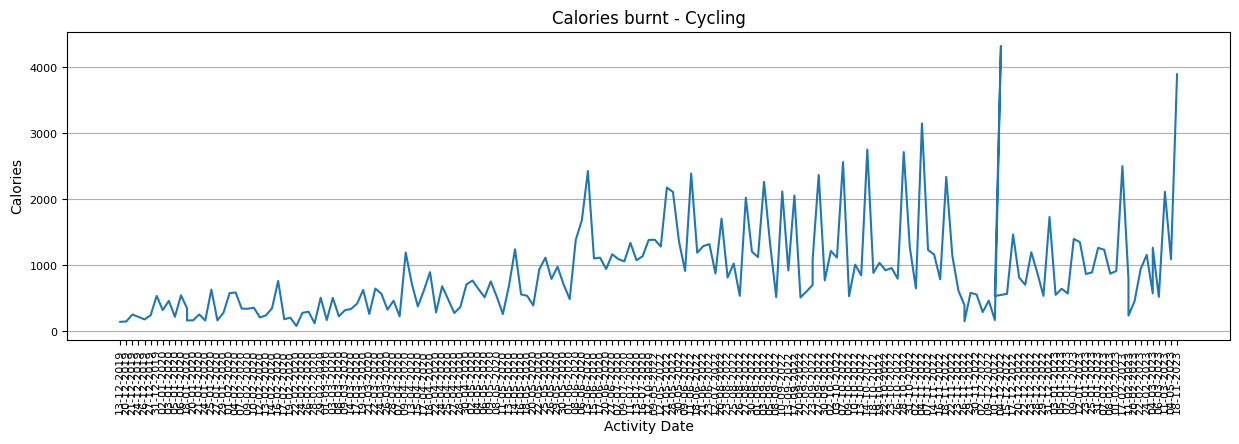

In [15]:
# Plotting data for Calories burnt analysis
def plot_ride_all_cal(d, x, y, title="", xlabel='Activity Date', ylabel='Calories', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:blue',  label='Calories')
    plt.grid(axis='y')
    plt.show()
    
plot_ride_all_cal(d=df_ride, x=df_ride['Activity Date'], y=df_ride['Calories'], title='Calories burnt - Cycling')

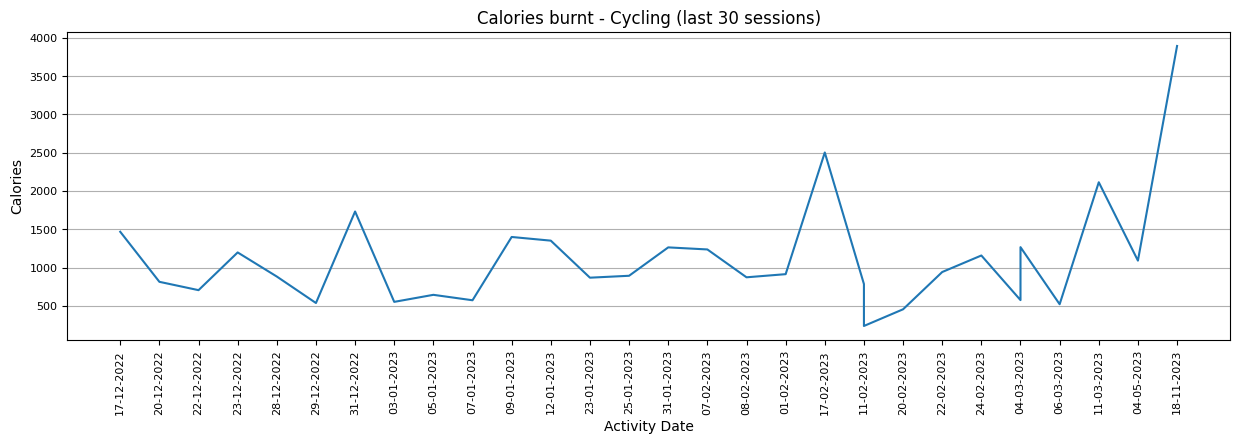

In [16]:
# Plotting data for Calories burnt analysis, last 30 sessions
def plot_ride_30_cal(d, x, y, title="", xlabel='Activity Date', ylabel='Calories', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:blue',  label='Calories')
    plt.grid(axis='y')
    plt.show()
    
plot_ride_30_cal(d=df_ride30, x=df_ride30['Activity Date'], y=df_ride30['Calories'], title='Calories burnt - Cycling (last 30 sessions)')

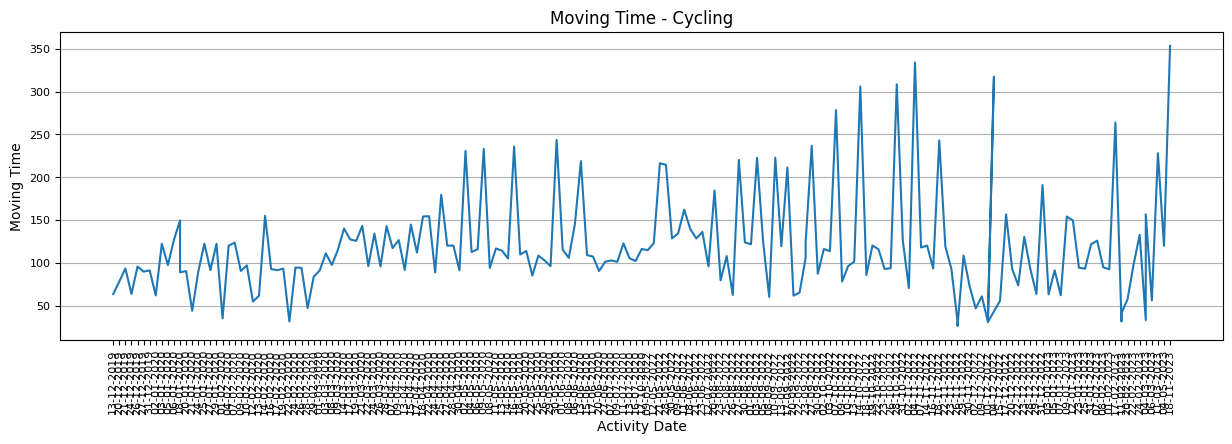

In [17]:
# Plotting data for Moving time analysis
def plot_ride_all_mvt(d, x, y, title="", xlabel='Activity Date', ylabel='Moving Time', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:blue',  label='Moving Time')
    plt.grid(axis="y")
    plt.show()
    
plot_ride_all_mvt(d=df_ride, x=df_ride['Activity Date'], y=df_ride['Moving Time']/60, title='Moving Time - Cycling')

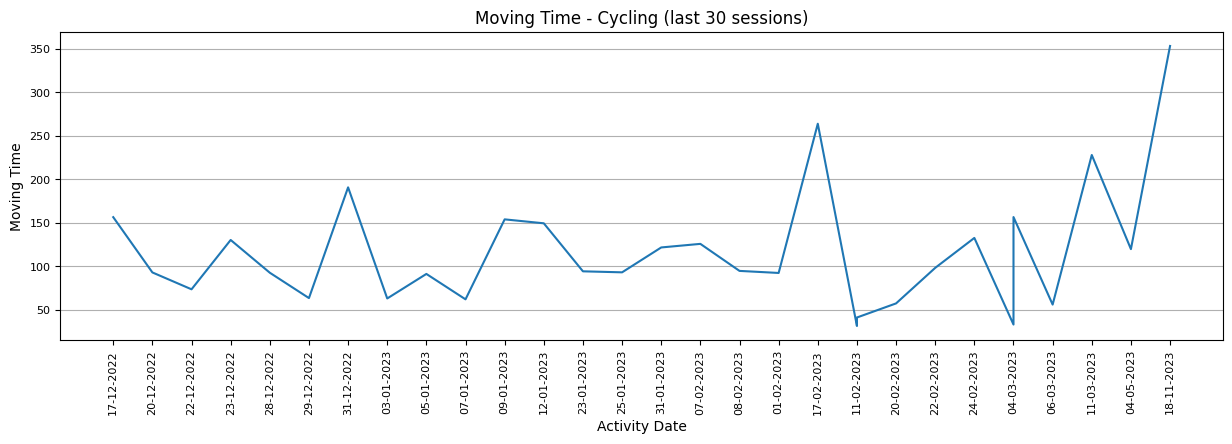

In [18]:
# Plotting data for Moving time analysis, last 30 sessions
def plot_ride_30_mvt(d, x, y, title="", xlabel='Activity Date', ylabel='Moving Time', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:blue',  label='Moving Time')
    plt.grid(axis="y")
    plt.show()
    
plot_ride_30_mvt(d=df_ride30, x=df_ride30['Activity Date'], y=df_ride30['Moving Time']/60, title='Moving Time - Cycling (last 30 sessions)')